In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [52]:
matplotlib inline

In [53]:
filename = '/home/ajay/Downloads/projects-discovery-of-handwashing-r-master/datasets/yearly_deaths_by_clinic.csv'
handwash_df = pd.read_csv(filename)

handwash_df.head()


,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1


In [54]:
handwash_df['proportions_death'] = (handwash_df['deaths'] / handwash_df['births'])

handwash_df.head()

,year,births,deaths,clinic,proportions_death
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015


In [55]:
handwash1 = handwash_df[handwash_df['clinic'] == 'clinic 1']
handwash2 = handwash_df[handwash_df['clinic'] == 'clinic 2']

handwash1.head()

,year,births,deaths,clinic,proportions_death
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015


In [56]:
handwash2.head()

,year,births,deaths,clinic,proportions_death
6,1841,2442,86,clinic 2,0.035217
7,1842,2659,202,clinic 2,0.075968
8,1843,2739,164,clinic 2,0.059876
9,1844,2956,68,clinic 2,0.023004
10,1845,3241,66,clinic 2,0.020364


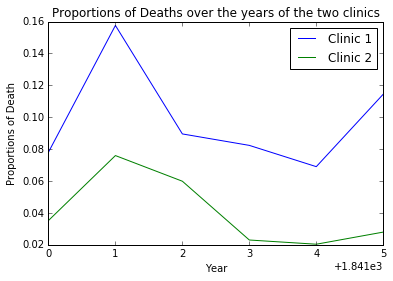

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

pp = PdfPages('Handwashing_Plots.pdf')

plot = handwash1.plot(x='year', y='proportions_death', label='Clinic 1')
handwash2.plot(x='year', y='proportions_death', label='Clinic 2', ax=plot)
plt.xlabel('Year')
plt.ylabel('Proportions of Death')
plt.title('Proportions of Deaths over the years of the two clinics')

pp.savefig()

plt.show()


In [59]:
filename1 = '/home/ajay/Downloads/projects-discovery-of-handwashing-r-master/datasets/monthly_deaths.csv'
monthly_df = pd.read_csv(filename1, parse_dates = ['date'])

monthly_df.head()

,date,births,deaths
0,1841-01-01 00:00:00,254,37
1,1841-02-01 00:00:00,239,18
2,1841-03-01 00:00:00,277,12
3,1841-04-01 00:00:00,255,4
4,1841-05-01 00:00:00,255,2


In [60]:
monthly_df['proportions_death'] = monthly_df['deaths'] / monthly_df['births']

monthly_df.head(12)

,date,births,deaths,proportions_death
0,1841-01-01 00:00:00,254,37,0.145669
1,1841-02-01 00:00:00,239,18,0.075314
2,1841-03-01 00:00:00,277,12,0.043321
3,1841-04-01 00:00:00,255,4,0.015686
4,1841-05-01 00:00:00,255,2,0.007843
5,1841-06-01 00:00:00,200,10,0.050000
6,1841-07-01 00:00:00,190,16,0.084211
7,1841-08-01 00:00:00,222,3,0.013514
8,1841-09-01 00:00:00,213,4,0.018779
9,1841-10-01 00:00:00,236,26,0.110169


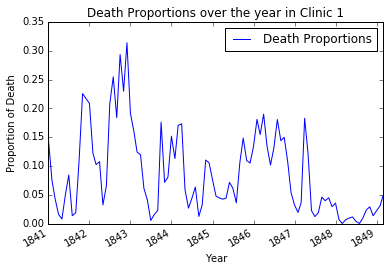

In [61]:
ax = monthly_df.plot(x='date', y='proportions_death', label='Death Proportions')
plt.ylabel('Proportion of Death')
plt.xlabel('Year')
plt.title('Death Proportions over the year in Clinic 1')

pp.savefig()

plt.show()

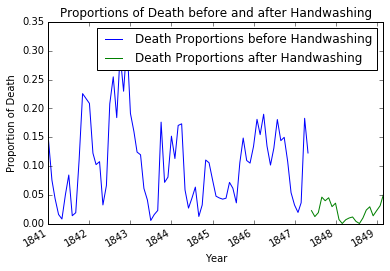

In [62]:
handwash_start = pd.to_datetime('1847-06-01')
    
handwash_before = monthly_df[pd.to_datetime(monthly_df['date']) < handwash_start]
handwash_after = monthly_df[pd.to_datetime(monthly_df['date']) >= handwash_start]

plot = handwash_before.plot(x='date', y='proportions_death', label='Death Proportions before Handwashing')
handwash_after.plot(x='date', y='proportions_death', label='Death Proportions after Handwashing', ax=plot)
plt.xlabel('Year')
plt.ylabel('Proportion of Death')
plt.title('Proportions of Death before and after Handwashing')

pp.savefig()

plt.show()


In [63]:
before = handwash_before['proportions_death']
after = handwash_after['proportions_death']

diff_mean = before.mean() - after.mean()

diff_mean

0.08395660751183336

In [64]:
pp.close()

In [65]:
mean_diff = []
for i in range(1000):
    before_value = handwash_before['proportions_death'].sample(frac = 1, replace=True)
    after_value = handwash_after['proportions_death'].sample(frac=1, replace=True)
    mean_diff.append(before_value.mean() - after_value.mean())

confidence_interval = pd.Series(mean_diff).quantile([0.025, 0.975])
confidence_interval

0.025    0.067644
0.975    0.101939
dtype: float64